In [1]:
from Crypto.Cipher import AES
from os import urandom
import time
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
en_key1 = urandom(32)
en_key2 = urandom(16)
names = ["512KB", "1MB", "5MB"]
data_sets = []
for name in names:
    with open(name, "rb") as f:
        data_sets.append(f.read())

# MIERZENIE CZASÓW

# CBC

In [3]:
obj = AES.new(en_key1, AES.MODE_CBC, en_key2)

In [4]:
en_cbc = []
ciphers = []
for data in data_sets:
    start = time.time()
    ciphertext = obj.encrypt(data)
    end = time.time()
    print(end - start)
    en_cbc.append(end - start)
    ciphers.append(ciphertext)

0.004472970962524414
0.009296894073486328
0.0470430850982666


In [5]:
obj2 = AES.new(en_key1, AES.MODE_CBC, en_key2)

In [6]:
de_cbc = []
for cipher in ciphers:
    start = time.time()
    decrypted = obj2.decrypt(cipher)
    end = time.time()
    print(end - start)
    de_cbc.append(end - start)

0.004181623458862305
0.009319305419921875
0.05040884017944336


# CTR

In [7]:
secret = urandom(16)
obj = AES.new(en_key1, AES.MODE_CTR, counter=lambda: secret)

In [8]:
en_ctr = []
ciphers = []
for data in data_sets:
    start = time.time()
    ciphertext = obj.encrypt(data)
    end = time.time()
    print(end - start)
    en_ctr.append(end - start)
    ciphers.append(ciphertext)

0.013115406036376953
0.025293588638305664
0.1346607208251953


In [9]:
obj2 = AES.new(en_key1, AES.MODE_CTR, counter=lambda: secret)

In [10]:
de_ctr = []
for cipher in ciphers:
    start = time.time()
    decrypted = obj2.decrypt(cipher)
    end = time.time()
    print(end - start)
    de_ctr.append(end - start)

0.01793646812438965
0.023694753646850586
0.10984230041503906


# CFB

In [11]:
obj = AES.new(en_key1, AES.MODE_CFB, en_key2)

In [12]:
en_cfb = []
ciphers = []
for data in data_sets:
    start = time.time()
    ciphertext = obj.encrypt(data)
    end = time.time()
    print(end - start)
    en_cfb.append(end - start)
    ciphers.append(ciphertext)

0.06387066841125488
0.11771893501281738
0.573664665222168


In [13]:
obj2 = AES.new(en_key1, AES.MODE_CFB, en_key2)

In [14]:
de_cfb = []
for cipher in ciphers:
    start = time.time()
    decrypted = obj2.decrypt(cipher)
    end = time.time()
    print(end - start)
    de_cfb.append(end - start)

0.06591176986694336
0.11753392219543457
0.5771627426147461


# OFB

In [15]:
obj = AES.new(en_key1, AES.MODE_OFB, en_key2)

In [16]:
en_ofb = []
ciphers = []
for data in data_sets:
    start = time.time()
    ciphertext = obj.encrypt(data)
    end = time.time()
    print(end - start)
    en_ofb.append(end - start)
    ciphers.append(ciphertext)

0.0051116943359375
0.009070158004760742
0.03991556167602539


In [17]:
obj2 = AES.new(en_key1, AES.MODE_OFB, en_key2)

In [18]:
de_ofb = []
for cipher in ciphers:
    start = time.time()
    decrypted = obj2.decrypt(cipher)
    end = time.time()
    print(end - start)
    de_ofb.append(end - start)

0.006143093109130859
0.01024627685546875
0.041881561279296875


# ECB

In [19]:
obj = AES.new(en_key1, AES.MODE_ECB, en_key2)

In [20]:
en_ecb = []
ciphers = []
for data in data_sets:
    start = time.time()
    ciphertext = obj.encrypt(data)
    end = time.time()
    print(end - start)
    en_ecb.append(end - start)
    ciphers.append(ciphertext)

0.0051441192626953125
0.008077144622802734
0.04146838188171387


In [21]:
obj2 = AES.new(en_key1, AES.MODE_ECB, en_key2)

In [22]:
de_ecb = []
for cipher in ciphers:
    start = time.time()
    decrypted = obj2.decrypt(cipher)
    end = time.time()
    print(end - start)
    de_ecb.append(end - start)

0.003824472427368164
0.008063316345214844
0.036843299865722656


# WYNIKI

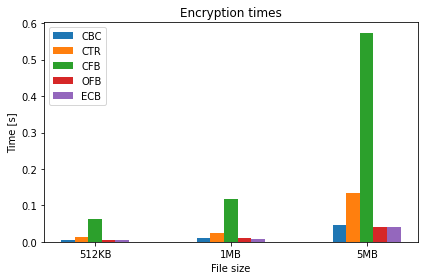

In [23]:
labels = ["512KB", "1MB", "5MB"]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3 * width + width, en_cbc, width, label='CBC')
rects2 = ax.bar(x - 2 * width + width, en_ctr, width, label='CTR')
rects3 = ax.bar(x - 1 * width + width, en_cfb, width, label='CFB')
rects4 = ax.bar(x + width, en_ofb, width, label='OFB')
rects5 = ax.bar(x + 1 * width + width, en_ecb, width, label='ECB')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('File size')
ax.set_title('Encryption times')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

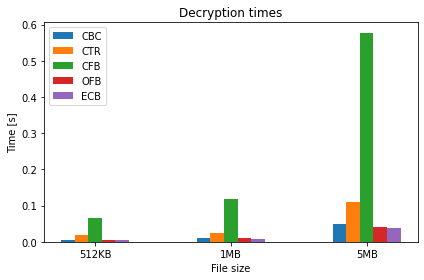

In [24]:
labels = ["512KB", "1MB", "5MB"]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3 * width + width, de_cbc, width, label='CBC')
rects2 = ax.bar(x - 2 * width + width, de_ctr, width, label='CTR')
rects3 = ax.bar(x - 1 * width + width, de_cfb, width, label='CFB')
rects4 = ax.bar(x + width, de_ofb, width, label='OFB')
rects5 = ax.bar(x + 1 * width + width, de_ecb, width, label='ECB')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('File size')
ax.set_title('Decryption times')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

# PROPAGACJA BŁĘDÓW

In [25]:
switch_numbers = [1, 10, 50]
data = data_sets[1]
data_arr = bytearray(data)

# CBC

In [26]:
obj = AES.new(en_key1, AES.MODE_CBC, en_key2)

In [27]:
cbc_mis = []
start = time.time()
cipher = obj.encrypt(data)
end = time.time()
print(end - start)

0.008748292922973633


In [28]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[0]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)

In [29]:
obj2 = AES.new(en_key1, AES.MODE_CBC, en_key2)

In [30]:
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)

0.01652383804321289


In [31]:
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1

cbc_mis.append(mistakes)

In [32]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[1]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_CBC, en_key2)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1

cbc_mis.append(mistakes)

0.009100198745727539


In [33]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[2]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_CBC, en_key2)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1

cbc_mis.append(mistakes)

0.009469270706176758


# CTR

In [34]:
secret = urandom(16)
obj = AES.new(en_key1, AES.MODE_CTR, counter=lambda: secret)

In [35]:
ctr_mis = []
start = time.time()
cipher = obj.encrypt(data)
end = time.time()
print(end - start)

0.022356271743774414


In [36]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[0]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)

In [37]:
obj2 = AES.new(en_key1, AES.MODE_CTR, counter=lambda: secret)

In [38]:
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)

0.026102066040039062


In [39]:
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ctr_mis.append(mistakes)

In [40]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[1]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_CTR, counter=lambda: secret)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ctr_mis.append(mistakes)

0.031014680862426758


In [41]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[2]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_CTR, counter=lambda: secret)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ctr_mis.append(mistakes)

0.02427220344543457


# CFB

In [42]:
obj = AES.new(en_key1, AES.MODE_CFB, en_key2)

In [43]:
cfb_mis = []
start = time.time()
cipher = obj.encrypt(data)
end = time.time()
print(end - start)

0.1186826229095459


In [44]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[0]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)

In [45]:
obj2 = AES.new(en_key1, AES.MODE_CFB, en_key2)

In [46]:
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)

0.11854696273803711


In [47]:
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
cfb_mis.append(mistakes)

In [48]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[1]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_CFB, en_key2)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
cfb_mis.append(mistakes)

0.1205434799194336


In [49]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[2]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_CFB, en_key2)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
cfb_mis.append(mistakes)

0.1223134994506836


# OFB

In [50]:
obj = AES.new(en_key1, AES.MODE_OFB, en_key2)

In [51]:
ofb_mis = []
start = time.time()
cipher = obj.encrypt(data)
end = time.time()
print(end - start)

0.01054239273071289


In [52]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[0]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)

In [53]:
obj2 = AES.new(en_key1, AES.MODE_OFB, en_key2)

In [54]:
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)

0.010909795761108398


In [55]:
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ofb_mis.append(mistakes)

In [56]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[1]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_OFB, en_key2)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ofb_mis.append(mistakes)

0.01237797737121582


In [57]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[2]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_OFB, en_key2)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ofb_mis.append(mistakes)

0.010712623596191406


# ECB

In [58]:
obj = AES.new(en_key1, AES.MODE_ECB, en_key2)

In [59]:
ecb_mis = []
start = time.time()
cipher = obj.encrypt(data)
end = time.time()
print(end - start)

0.00830078125


In [60]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[0]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)

In [61]:
obj2 = AES.new(en_key1, AES.MODE_ECB, en_key2)

In [62]:
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)

0.017068147659301758


In [63]:
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ecb_mis.append(mistakes)

In [64]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[1]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_ECB, en_key2)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ecb_mis.append(mistakes)

0.009848356246948242


In [65]:
cipher_arr = bytearray(cipher)
messed_cipher = cipher_arr
for i in range(switch_numbers[2]):
    messed_cipher[randint(0, len(messed_cipher) - 1)] = cipher_arr[randint(0, len(messed_cipher) - 1)]
messed_cipher = bytes(messed_cipher)
obj2 = AES.new(en_key1, AES.MODE_ECB, en_key2)
start = time.time()
decrypted = obj2.decrypt(messed_cipher)
end = time.time()
print(end - start)
decrypted = bytearray(decrypted)
mistakes = 0
for i in range(len(decrypted)):
    if decrypted[i] != data_arr[i]:
        mistakes += 1
ecb_mis.append(mistakes)

0.009206295013427734


# WYNIKI

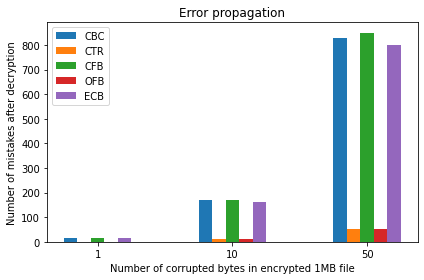

In [69]:
labels = ["1", "10", "50"]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3 * width + width, cbc_mis, width, label='CBC')
rects2 = ax.bar(x - 2 * width + width, ctr_mis, width, label='CTR')
rects3 = ax.bar(x - 1 * width + width, cfb_mis, width, label='CFB')
rects4 = ax.bar(x + width, ofb_mis, width, label='OFB')
rects5 = ax.bar(x + 1 * width + width, ecb_mis, width, label='ECB')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of mistakes after decryption')
ax.set_xlabel('Number of corrupted bytes in encrypted 1MB file')
ax.set_title('Error propagation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [67]:
# cbc_mis, ctr_mis, cfb_mis, ofb_mis, ecb_mis